<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Data Science Para Análise Multivariada de Dados</font>
## <font color='blue'>Projeto 2 - Parte 2 - Modelagem</font>
### <font color='blue'>Seleção de Modelos de Machine Learning em Análise Multivariada com Dados Anonimizados</font>

### Instalando e Carregando Pacotes

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [1]:
# Este pacote não vem com o Anaconda e precisa ser instalado
# Kaggle
!pipenv install -q xgboost

Courtesy Notice:
Pipenv found itself running within a virtual environment,  so it will 
automatically use that environment, instead of  creating its own for any 
project. You can set
PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and 
create  its own instead.
You can set PIPENV_VERBOSITY=-1 to suppress this warning.
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.
Installing xgboost...
✔ Installation Succeeded
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.
Installing dependencies from Pipfile.lock (f1e1c9)...
All dependencies are now up-to-date!
Upgrading xgboost in  dependencies.
Building requirements...
Resolving dependencies....
✔ Success! Locking packages...
⠸ Locking packages...
Building requirements...
Resolving dependencies....
✔ Success! Locking packages...
⠦ Locking packages...
To activate this project

In [4]:
# Imports
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/brunoramoslemos/.local/share/virtualenvs/data_science_repo-dhSa4S5y/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <F2F42313-BF4F-3B95-A853-AE1DE94D4C87> /Users/brunoramoslemos/.local/share/virtualenvs/data_science_repo-dhSa4S5y/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file)"]


In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" 

Author: Data Science Academy



## Carregando os Dados Pré-Processados

In [3]:
# Carregando o dataset de treino
df_treino = pd.read_csv('datasets_cap7/dados_treino.csv')

# Carregando o dataset de treino final
df_treino_final = pd.read_csv('datasets_cap7/dados_treino_final.csv')

# Carregando o dataset de validação
df_valid = pd.read_csv('datasets_cap7/dados_valid.csv')

# Carregando o dataset de teste
df_teste = pd.read_csv('datasets_cap7/dados_teste.csv')

In [4]:
# Carregando os nomes das colunas de entrada
with open('datasets_cap7/colunas_entrada.sav', 'rb') as file:
    colunas_entrada = pickle.load(file)

## Preparando as Matrizes

In [5]:
# Prepara a Matriz X
X_treino = df_treino_final[colunas_entrada].values
X_valid = df_valid[colunas_entrada].values
X_teste = df_teste[colunas_entrada].values

In [6]:
# Prepara a Matriz Y
y_treino = df_treino_final['LABEL_TARGET'].values
y_valid = df_valid['LABEL_TARGET'].values
y_teste = df_teste['LABEL_TARGET'].values

In [7]:
# Print
print('Shape dos dados de treino:', X_treino.shape, y_treino.shape)
print('Shape dos dados de validação:', X_valid.shape, y_valid.shape)
print('Shape dos dados de teste:', X_teste.shape, y_teste.shape)

Shape dos dados de treino: (3238, 178) (3238,)
Shape dos dados de validação: (1725, 178) (1725,)
Shape dos dados de teste: (1725, 178) (1725,)


In [8]:
type(X_treino)

numpy.ndarray

In [9]:
X_treino

array([[-110, -106, -106, ..., -213, -163,  -93],
       [ -30,  -27,  -36, ...,  -79,  -76,  -82],
       [ -29,  -19,   -8, ...,  -47,  -31,  -18],
       ...,
       [  -3,    4,   18, ...,   38,   30,   19],
       [ -27,  -35,  -26, ...,  -86,  -88,  -99],
       [  45,   54,   57, ...,   -8,  -12,  -15]])

## Padronização dos Dados

In [24]:
# Crio o objeto
scaler = StandardScaler()

# Faço o fit, criando padrão de Scaler
scaler.fit(X_treino)

# Salva o objeto em disco e carrega para usarmos adiante
scalerfile = 'datasets_cap7/scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

# Carrega o scaler (padronizador)
scaler = pickle.load(open(scalerfile, 'rb'))

# Aplica a padronização em nossas matrizes de dados
X_treino_tf = scaler.transform(X_treino)
X_valid_tf = scaler.transform(X_valid)
X_teste_tf = scaler.transform(X_teste)

In [11]:
X_treino_tf

array([[-0.38807952, -0.37625874, -0.3882372 , ..., -0.80126623,
        -0.59149272, -0.3083767 ],
       [-0.0653993 , -0.06055575, -0.10609426, ..., -0.25578757,
        -0.24085026, -0.26452253],
       [-0.0613658 , -0.02858583,  0.00676292, ..., -0.12552401,
        -0.05948348, -0.00937094],
       ...,
       [ 0.04350528,  0.0633277 ,  0.11155887, ...,  0.22048858,
         0.18636928,  0.13813857],
       [-0.05329879, -0.09252568, -0.06578813, ..., -0.28428272,
        -0.28921474, -0.33229717],
       [ 0.23711341,  0.26313972,  0.26875279, ...,  0.03323471,
         0.01709361,  0.00258929]])

## Modelagem Preditiva

### Funções Auxiliares

In [12]:
# Função para calcular a especificidade
def dsa_calcula_especificidade(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)

A especificidade é uma métrica usada para avaliar o desempenho de um modelo de classificação, especialmente em problemas de classificação binária. Ela mede a proporção de verdadeiros negativos (TN) em relação ao total de negativos reais, ou seja, a capacidade do modelo de identificar corretamente as instâncias negativas.

Aqui está o que cada parte significa:

**y_pred < thresh**: Esta é uma condição que verifica se a previsão do modelo (y_pred) é menor que um determinado limiar (thresh). Se o modelo for de classificação binária, esse limiar geralmente é 0.5, mas pode ser ajustado de acordo com as necessidades específicas do problema. Essa condição retorna um vetor booleano, onde cada elemento é True se a previsão for menor que o limiar (indicando uma previsão de classe negativa) e False caso contrário.

**y_actual == 0**: Esta é uma condição que verifica quais elementos do vetor de rótulos reais (y_actual) são iguais a 0, ou seja, pertencem à classe negativa. Isso também retorna um vetor booleano.

**(y_pred < thresh) & (y_actual == 0)**: Este é o operador lógico "e" aplicado entre os dois vetores booleanos anteriores. Ele retorna um novo vetor booleano, onde cada elemento é True apenas se ambas as condições forem verdadeiras para esse elemento, ou seja, se a previsão for negativa e o rótulo real também for negativo. Isso representa os verdadeiros negativos (TN).

**sum((y_pred < thresh) & (y_actual == 0))**: Esta é a soma dos valores True no vetor booleano resultante, que é equivalente ao número de verdadeiros negativos (TN).

**sum(y_actual == 0)**: Esta é a soma dos valores True no vetor booleano que representa os rótulos reais negativos, que é equivalente ao número total de instâncias negativas reais (TN + FP).

**sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)**: Esta é a razão entre o número de verdadeiros negativos (TN) e o número total de instâncias negativas reais (TN + FP), que é a definição de especificidade.

In [13]:
# Função para gerar relatório de métricas
def dsa_print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = dsa_calcula_especificidade(y_actual, y_pred, thresh)
    
    print('AUC:%.3f'%auc)
    print('Acurácia:%.3f'%accuracy)
    print('Recall:%.3f'%recall)
    print('Precisão:%.3f'%precision)
    print('Especificidade:%.3f'%specificity)
    print(' ')
    
    return auc, accuracy, recall, precision, specificity 

In [14]:
thresh = 0.5

### Versão 1 do Modelo - Regressão Logística (Sem Otimização de Hiperparâmetros)

Veja a descrição deste modelo no videobook.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [15]:
# Construção do modelo

# Cria o classificador (objeto)
lr1 = LogisticRegression()

# Treina e cria o modelo
modelo_v1 = lr1.fit(X_treino_tf, y_treino)

# Previsões 
y_train_preds = modelo_v1.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v1.predict_proba(X_valid_tf)[:,1]

print('Modelo de Regressão Logística (Sem Otimização de Hiperparâmetros)\n')

print('Treinamento:\n')
lr1_train_auc, lr1_train_accuracy, lr1_train_recall, lr1_train_precision, lr1_train_specificity = dsa_print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
lr1_valid_auc, lr1_valid_accuracy, lr1_valid_recall, lr1_valid_precision, lr1_valid_specificity = dsa_print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)


Modelo de Regressão Logística (Sem Otimização de Hiperparâmetros)

Treinamento:

AUC:0.622
Acurácia:0.647
Recall:0.524
Precisão:0.695
Especificidade:0.770
 
Validação:

AUC:0.547
Acurácia:0.686
Recall:0.469
Precisão:0.288
Especificidade:0.736
 


### Versão 2 do Modelo - Regressão Logística (Com Otimização de Hiperparâmetros)

Veja a descrição deste modelo no videobook.

In [16]:
# Construção do modelo

# Cria o classificador (objeto)
lr2 = LogisticRegression(random_state = 142, solver = 'liblinear', l1_ratio=0)


# Treina e cria o modelo
modelo_v2 = lr2.fit(X_treino_tf, y_treino)

# Previsões 
y_train_preds = modelo_v2.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v2.predict_proba(X_valid_tf)[:,1]

print('Modelo de Regressão Logística (Com Otimização de Hiperparâmetros)\n')

print('Treinamento:\n')
lr2_train_auc, lr2_train_accuracy, lr2_train_recall, lr2_train_precision, lr2_train_specificity = dsa_print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
lr2_valid_auc, lr2_valid_accuracy, lr2_valid_recall, lr2_valid_precision, lr2_valid_specificity = dsa_print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)


Modelo de Regressão Logística (Com Otimização de Hiperparâmetros)

Treinamento:

AUC:0.626
Acurácia:0.652
Recall:0.531
Precisão:0.701
Especificidade:0.773
 
Validação:

AUC:0.549
Acurácia:0.690
Recall:0.472
Precisão:0.292
Especificidade:0.740
 


### Versão 3 do Modelo - Naive Bayes

Veja a descrição deste modelo no videobook.

https://scikit-learn.org/stable/modules/naive_bayes.html

In [17]:
# Construção do modelo

# Cria o classificador (objeto)
nb = GaussianNB()

# Treina e cria o modelo
modelo_v3 = nb.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = modelo_v3.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v3.predict_proba(X_valid_tf)[:,1]

print('Modelo Naive Bayes:\n')

print('Treinamento:\n')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity = dsa_print_report(y_treino, 
                                                                                                              y_train_preds, 
                                                                                                              thresh)

print('Validação:\n')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = dsa_print_report(y_valid, 
                                                                                                              y_valid_preds, 
                                                                                                              thresh)
                  

Modelo Naive Bayes:

Treinamento:

AUC:0.984
Acurácia:0.934
Recall:0.893
Precisão:0.972
Especificidade:0.975
 
Validação:

AUC:0.988
Acurácia:0.964
Recall:0.909
Precisão:0.898
Especificidade:0.977
 


### Versão 4 do Modelo - XGBoost (Xtreme Gradient Boosting Classifier)

Veja a descrição deste modelo no videobook.

https://xgboost.readthedocs.io/en/stable/index.html

In [18]:
# Construção do modelo (Ensemble)

# Cria o classificador
xgbc = XGBClassifier()

# Treina e cria o modelo
modelo_v4 = xgbc.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = modelo_v4.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v4.predict_proba(X_valid_tf)[:,1]

print('Modelo Xtreme Gradient Boosting Classifier:\n')

print('Treinamento:\n')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = dsa_print_report(y_treino, 
                                                                                                                        y_train_preds, 
                                                                                                                        thresh)

print('Validação:\n')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = dsa_print_report(y_valid, 
                                                                                                                        y_valid_preds, 
                                                                                                                        thresh)


Modelo Xtreme Gradient Boosting Classifier:

Treinamento:

AUC:1.000
Acurácia:1.000
Recall:1.000
Precisão:1.000
Especificidade:1.000
 
Validação:

AUC:0.993
Acurácia:0.962
Recall:0.950
Precisão:0.859
Especificidade:0.964
 


## Versão 5 do Modelo - RandomForest

Veja a descrição deste modelo no videobook.

In [25]:
# Cria o classificador com RandomForest
rfc = RandomForestClassifier()

# Treina e cria o modelo
modelo_v5 = rfc.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = modelo_v5.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v5.predict_proba(X_valid_tf)[:,1]
y_test_preds = modelo_v5.predict_proba(X_teste_tf)[:,1]


print('Modelo Random Forest Classifier:\n')

print('Treinamento:\n')
rfc_train_auc, rfc_train_accuracy, rfc_train_recall, rfc_train_precision, rfc_train_specificity = dsa_print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
rfc_valid_auc, rfc_valid_accuracy, rfc_valid_recall, rfc_valid_precision, rfc_valid_specificity = dsa_print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)


print('Testes:\n')
rfc_test_auc, rfc_test_accuracy, rfc_test_recall, rfc_test_precision, rfc_test_specificity = dsa_print_report(y_teste, 
                                                                                                                   y_test_preds, 
                                                                                                                   thresh)

Modelo Random Forest Classifier:

Treinamento:

AUC:1.000
Acurácia:1.000
Recall:1.000
Precisão:1.000
Especificidade:1.000
 
Validação:

AUC:0.994
Acurácia:0.952
Recall:0.969
Precisão:0.812
Especificidade:0.947
 
Testes:

AUC:0.994
Acurácia:0.947
Recall:0.981
Precisão:0.806
Especificidade:0.933
 


### Seleção de Modelos

In [20]:
# Tabela de resultados
df_results = pd.DataFrame({'classificador':['RL1', 'RL1', 'RL2', 'RL2', 'NB', 'NB', 'XGB', 'XGB', 'RFC', 'RFC'],
                           'data_set':['treino','valid'] * 5,
                           'auc':[lr1_train_auc,
                                  lr1_valid_auc,
                                  lr2_train_auc,
                                  lr2_valid_auc,
                                  nb_train_auc,
                                  nb_valid_auc,
                                  xgbc_train_auc,
                                  xgbc_valid_auc,
                                  rfc_train_auc,
                                  rfc_valid_auc],
                           'accuracy':[lr1_train_accuracy,
                                       lr1_valid_accuracy,
                                       lr2_train_accuracy,
                                       lr2_valid_accuracy,
                                       nb_train_accuracy,
                                       nb_valid_accuracy,
                                       xgbc_train_accuracy,
                                       xgbc_valid_accuracy,
                                       rfc_train_accuracy,
                                       rfc_valid_accuracy],
                           'recall':[lr1_train_recall,
                                     lr1_valid_recall,
                                     lr2_train_recall,
                                     lr2_valid_recall,
                                     nb_train_recall,
                                     nb_valid_recall,
                                     xgbc_train_recall,
                                     xgbc_valid_recall,
                                     rfc_train_recall,
                                     rfc_valid_recall],
                           'precision':[lr1_train_precision,
                                        lr1_valid_precision,
                                        lr2_train_precision,
                                        lr2_valid_precision,
                                        nb_train_precision,
                                        nb_valid_precision,
                                        xgbc_train_precision,
                                        xgbc_valid_precision,
                                        rfc_train_precision,
                                        rfc_valid_precision],
                           'specificity':[lr1_train_specificity,
                                          lr1_valid_specificity,
                                          lr2_train_specificity,
                                          lr2_valid_specificity,
                                          nb_train_specificity,
                                          nb_valid_specificity,
                                          xgbc_train_specificity,
                                          xgbc_valid_specificity,
                                          rfc_train_specificity,
                                          rfc_valid_specificity]})

In [21]:
# Resultados
df_results

,classificador,data_set,auc,accuracy,recall,precision,specificity
0,RL1,treino,0.622203,0.647313,0.524398,0.695332,0.770229
1,RL1,valid,0.546646,0.686377,0.468750,0.287908,0.735943
2,RL2,treino,0.625596,0.651946,0.530574,0.700653,0.773317
3,RL2,valid,0.549468,0.689855,0.471875,0.292070,0.739502
4,NB,treino,0.984175,0.933601,0.892526,0.972409,0.974676
5,NB,valid,0.987794,0.964058,0.909375,0.898148,0.976512
6,XGB,treino,1.000000,1.000000,1.000000,1.000000,1.000000
7,XGB,valid,0.993210,0.961739,0.950000,0.858757,0.964413
8,RFC,treino,1.000000,1.000000,1.000000,1.000000,1.000000
9,RFC,valid,0.993992,0.953623,0.971875,0.814136,0.946619


In [22]:
# Resultados em validação com ordenação pelo AUC
df_results[df_results['data_set'] == 'valid'].sort_values(by = 'auc', ascending = False)

,classificador,data_set,auc,accuracy,recall,precision,specificity
9,RFC,valid,0.993992,0.953623,0.971875,0.814136,0.946619
7,XGB,valid,0.993210,0.961739,0.950000,0.858757,0.964413
5,NB,valid,0.987794,0.964058,0.909375,0.898148,0.976512
3,RL2,valid,0.549468,0.689855,0.471875,0.292070,0.739502
1,RL1,valid,0.546646,0.686377,0.468750,0.287908,0.735943


A métrica de desempenho escolhida será a pontuação AUC (AUC Score) do conjunto de validação. É a pontuação mais comum usada para comparar modelos de algoritmos diferentes.

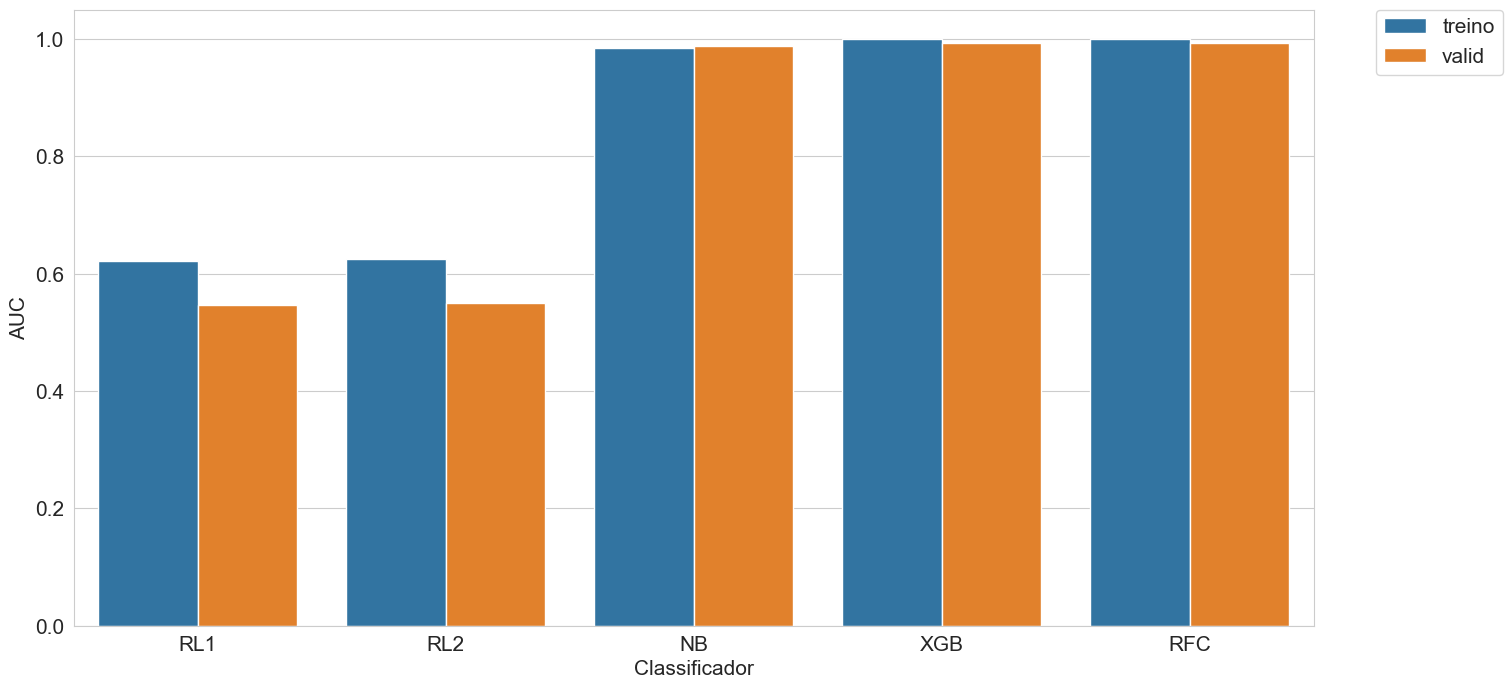

In [26]:
# Construção do Plot
sns.set_style("whitegrid")
plt.figure(figsize = (16, 8))

# Gráfico de barras
ax = sns.barplot(x = 'classificador', y = 'auc', hue = 'data_set', data = df_results)
ax.set_xlabel('Classificador', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

# Legenda
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

## Otimização de Hiperparâmetros e Validação Cruzada

Será que conseguimos melhorar a performance do melhor modelo? 

Para incluir a otimização de hiperparâmetros e a validação cruzada no projeto, você pode usar o GridSearchCV do scikit-learn, que permite buscar a melhor combinação de hiperparâmetros para o modelo. Vamos usar o RandomForest como modelo base.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [27]:
%%time

# Importa a função GridSearchCV
from sklearn.model_selection import GridSearchCV

# Defina o espaço de busca dos hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Cria o classificador com RandomForest
classificador = RandomForestClassifier()

# Configura o GridSearchCV
grid_search = GridSearchCV(estimator = classificador, 
                           param_grid = param_grid, 
                           cv = 5, 
                           scoring = 'roc_auc', 
                           verbose = 2, 
                           n_jobs = -1)

# Treina o modelo com validação cruzada e busca pelos melhores hiperparâmetros
modelo_v5_otimizado = grid_search.fit(X_treino_tf, y_treino)

# Melhores hiperparâmetros encontrados
print('Melhores hiperparâmetros:', modelo_v5_otimizado.best_params_)

# Previsões
y_train_preds = modelo_v5_otimizado.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v5_otimizado.predict_proba(X_valid_tf)[:,1]

print('Modelo Random Forest Classifier com Otimização de Hiperparâmetros e Validação Cruzada:\n')

print('Treinamento:\n')
rfc_train_auc, rfc_train_accuracy, rfc_train_recall, rfc_train_precision, rfc_train_specificity = dsa_print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
rfc_valid_auc, rfc_valid_accuracy, rfc_valid_recall, rfc_valid_precision, rfc_valid_specificity = dsa_print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.1s
[CV] END m

## Qual Versão Final Devemos Usar? Justifique Sua Resposta!

Modelo RandomForest "Vanilla":

Validação:

- AUC:0.993
- Acurácia:0.958
- Recall:0.977
- Precisão:0.838
- Especificidade:0.951
 

Modelo RandomForest Otimizado:

Validação:

- AUC:0.993
- Acurácia:0.961
- Recall:0.980
- Precisão:0.846
- Especificidade:0.956

Ambos os modelos com RandomForest apresentam desempenho muito alto, mas há algumas nuances a serem consideradas ao escolher qual deles usar:

**Desempenho na validação**: O modelo com otimização de hiperparâmetros tem uma AUC ligeiramente maior na validação, o que indica que ele pode generalizar um pouco melhor. No entanto, outras métricas são um pouco menores nesse modelo. Essas diferenças são pequenas e podem não ser significativas, dependendo do contexto e da importância relativa dessas métricas para o seu problema específico.

**Complexidade e tempo de treinamento**: A otimização de hiperparâmetros aumenta a complexidade do processo de treinamento e o tempo necessário para treinar o modelo. Se o tempo de treinamento for uma preocupação e as diferenças de desempenho forem consideradas insignificantes, você pode optar pelo modelo sem otimização de hiperparâmetros.

Se você estiver preocupado com o overfitting e quiser um modelo que possa generalizar um pouco melhor para novos dados, o modelo com otimização de hiperparâmetros pode ser a melhor escolha, apesar de seu desempenho ligeiramente inferior na validação em algumas métricas. No entanto, se o tempo de treinamento for uma preocupação e as diferenças de desempenho forem aceitáveis para o seu caso de uso, o modelo sem otimização de hiperparâmetros pode ser suficiente.

Decisão: Usaremos o modelo RandomForest sem otimização de hiperparâmetros pois é mais simples e requer menos tempo de treinamento.

### Salvando o Melhor Modelo

In [29]:
# Grava o modelo em disco
pickle.dump(modelo_v5, open('modelos/melhor_modelo.pkl', 'wb'), protocol = 4)

> Vamos fazer a avaliação final do melhor modelo.

In [30]:
# Carrega o modelo, as colunas e o scaler
best_model = pickle.load(open('modelos/melhor_modelo.pkl','rb'))
cols_input = pickle.load(open('datasets_cap7/colunas_entrada.sav','rb'))
scaler = pickle.load(open('datasets_cap7/scaler.sav', 'rb'))

# Carrega os dados
df_train = pd.read_csv('datasets_cap7/dados_treino_final.csv')
df_valid = pd.read_csv('datasets_cap7/dados_valid.csv')
df_test = pd.read_csv('datasets_cap7/dados_teste.csv')

# Cria matrizes x e y

# X
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

# Y
y_train = df_train['LABEL_TARGET'].values
y_valid = df_valid['LABEL_TARGET'].values
y_test = df_test['LABEL_TARGET'].values

# Aplica a transformação nos dados
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [31]:
# Previsões de probabilidade
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

> Avaliação final.

In [32]:
thresh = 0.5

print('\nTreinamento:\n')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = dsa_print_report(y_train,
                                                                                               y_train_preds, 
                                                                                               thresh)

print('\nValidação:\n')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = dsa_print_report(y_valid,
                                                                                               y_valid_preds, 
                                                                                               thresh)

print('\nTeste:\n')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = dsa_print_report(y_test,
                                                                                          y_test_preds, 
                                                                                          thresh)


Treinamento:

AUC:1.000
Acurácia:1.000
Recall:1.000
Precisão:1.000
Especificidade:1.000
 

Validação:

AUC:0.994
Acurácia:0.952
Recall:0.969
Precisão:0.812
Especificidade:0.947
 

Teste:

AUC:0.994
Acurácia:0.947
Recall:0.981
Precisão:0.806
Especificidade:0.933
 


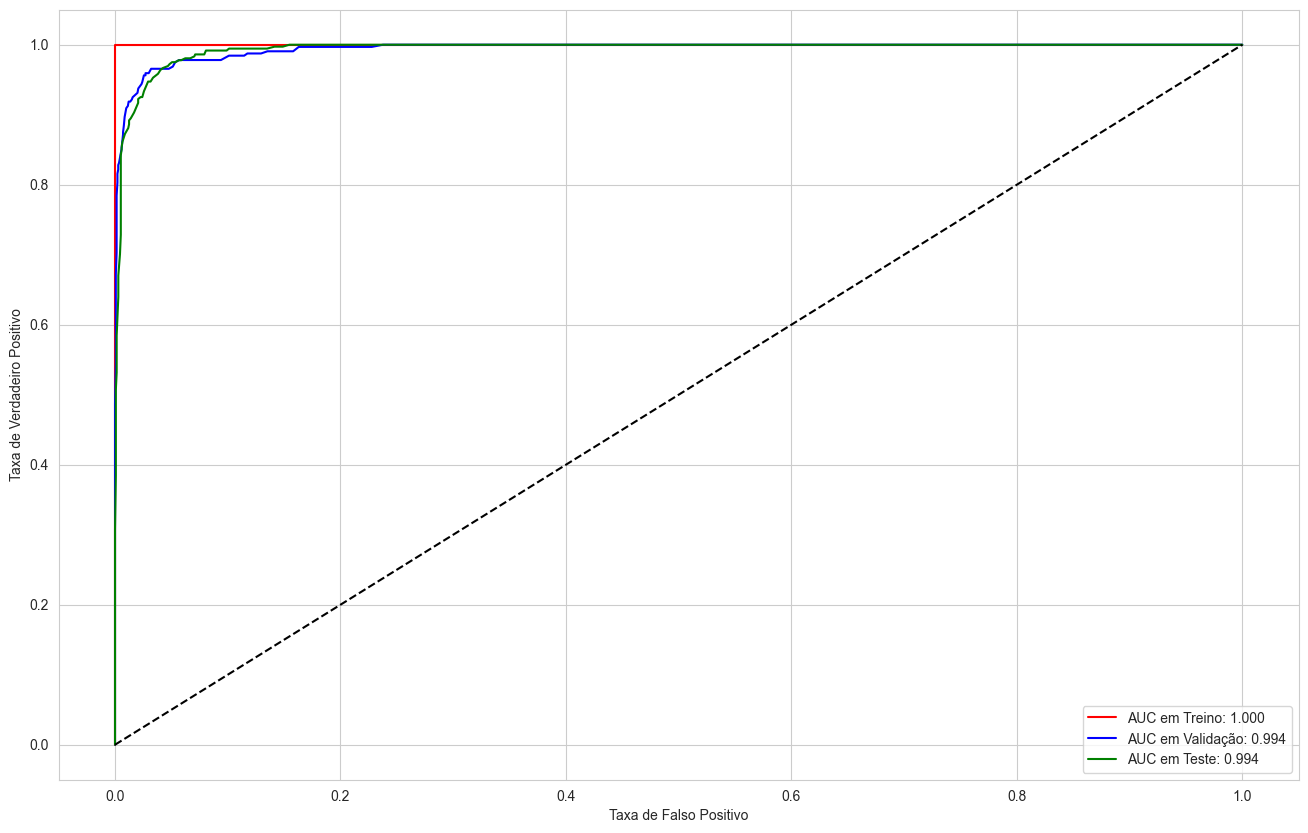

In [33]:
# Calcula a curva ROC nos dados de treino
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# Calcula a curva ROC nos dados de validação
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

# Calcula a curva ROC nos dados de teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

# Plot
plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-', label = 'AUC em Treino: %.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-', label = 'AUC em Validação: %.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-', label = 'AUC em Teste: %.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend()
plt.show()

## Deploy do Modelo

In [34]:
# Carregando dados de um novo cliente
novo_cliente = pd.read_csv('datasets_cap7/novo_cliente.csv')

In [35]:
novo_cliente.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,42,53,44,31,15,12,6,4,1,-4,...,-41,-16,2,22,33,45,56,67,69,63


In [36]:
novo_cliente_scaled = scaler.transform(novo_cliente)

In [37]:
novo_cliente_scaled

array([[ 0.2250129 ,  0.25914348,  0.21635481,  0.15584606,  0.08334306,
         0.06638694,  0.04085232,  0.03779354,  0.02442366, -0.0023313 ,
        -0.04879572, -0.08212179, -0.09244538, -0.08470805, -0.0612443 ,
        -0.05062929, -0.05258746, -0.06281866, -0.04737228, -0.04037573,
        -0.05940994, -0.03866161, -0.01004095,  0.00647221,  0.00274661,
         0.00250159,  0.02509338,  0.04769075,  0.07791457,  0.07658328,
         0.06296305,  0.01633673,  0.00437639, -0.01120775,  0.00978042,
         0.03348395,  0.06947402,  0.11066401,  0.13092602,  0.17167477,
         0.190069  ,  0.2114598 ,  0.20390016,  0.22345916,  0.21964509,
         0.21085108,  0.19152251,  0.14274641,  0.07811625,  0.02839757,
         0.01036905, -0.04941033, -0.10416372, -0.14607086, -0.1712468 ,
        -0.19181859, -0.19871953, -0.19734214, -0.1906922 , -0.15470814,
        -0.11651304, -0.0736498 , -0.03363869, -0.04662175, -0.03176386,
        -0.02531754, -0.01106278,  0.03762973,  0.0

In [ ]:
best_model.predict_proba(novo_cliente_scaled)

array([0.00665855, 0.0042986 , 0.00423853, 0.00345259, 0.00277968,
       0.00528832, 0.00579599, 0.00584722, 0.00490594, 0.00146783,
       0.00710817, 0.0120111 , 0.00830983, 0.01292971, 0.01006119,
       0.01170993, 0.00353221, 0.00411758, 0.00404942, 0.00717911,
       0.0098521 , 0.00260469, 0.00458889, 0.00639954, 0.01323267,
       0.01039924, 0.01520035, 0.01558737, 0.01402448, 0.00954475,
       0.00667505, 0.01498858, 0.00692374, 0.00299874, 0.00704646,
       0.00627334, 0.00734893, 0.01053268, 0.00353554, 0.0039875 ,
       0.00442407, 0.00178447, 0.00908657, 0.00571977, 0.00861005,
       0.01172412, 0.00256575, 0.00277583, 0.00152168, 0.00152243,
       0.00228115, 0.00705164, 0.00681857, 0.0057365 , 0.00511185,
       0.00135702, 0.00255857, 0.00154333, 0.00231335, 0.00292648,
       0.00524421, 0.00843713, 0.00287164, 0.00298457, 0.00611296,
       0.00155676, 0.00230241, 0.00194026, 0.00136451, 0.00437381,
       0.00451779, 0.00264002, 0.00332715, 0.00100482, 0.00143

In [39]:
best_model.predict(novo_cliente_scaled)

array([0])

De acordo com a previsão do modelo, esse cliente não vai fazer a renovação do seguro.

In [40]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [39]:
#%watermark -v -m

In [40]:
#%watermark --iversions

# Fim